In [20]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import imageio
%matplotlib inline
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split

In [21]:
# get excel file
current_dir = Path.cwd()
file = pd.ExcelFile(current_dir / 'County_Training_Test_Normalized_2.xlsx')

# convert to dataframe
df = file.parse("Training Data")

# get dataset
dataset = df.to_numpy()
# print(dataset)

# get features for datapoints
X = np.delete(dataset, [0,1,7,8], axis=1)
X = X.astype(float)
num_features = X.shape[1]
# print(num_features)
# print(X)

# get labels
# 7 corresponds to voter turnout, 8 corresponds to voter turnout in 0,1,2 buckets 
Y = dataset[:,[7]]
Y = Y.astype(float)
Y = Y.ravel()
# print(Y)
Y_bucket = dataset[:,[8]]
Y_bucket = Y_bucket.astype(float)
Y_bucket = Y_bucket.ravel()

# get counties
counties = dataset[:,[1]]

# get feature names
new_df = df.drop("County", axis=1)
new_df = new_df.drop("States", axis=1)
new_df = new_df.drop("Percentage Voter Turnout", axis=1)
new_df = new_df.drop("Labels", axis=1)
feature_names = list(new_df.columns.values)

# print(feature_names)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X) + 2
# print(Y)

In [22]:
#test train split
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [23]:
# perform PCA to reduce to 2 dimensions
pca = sklearnPCA(n_components=2) #2-dimensional PCA
features = pca.fit_transform(X)
feat_test = pca.transform(X_test)

In [24]:
#encode labels
le = preprocessing.LabelEncoder()
encoded_Y = le.fit_transform(Y)

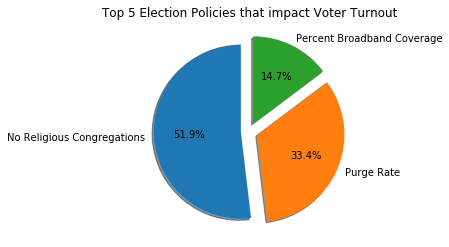

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# convert Y to classes based on threshold
threshold = np.mean(Y)
labels = Y.copy()
labels[labels < threshold] = 0 # low turnout
labels[labels >= threshold] = 1 # high turnout

# Visualize feature importance
K = 3
explode = np.zeros(K)
explode[:K] = 0.1
model = SelectKBest(f_regression, k=K)
model.fit_transform(X, labels)
indices = np.argsort(model.scores_)[::-1]
top_features = []
for i in indices:
    top_features.append(feature_names[i])

fig = plt.figure()
fig.clf()
ax = fig.add_subplot(111)
plt.title("Top 5 Election Policies that impact Voter Turnout")
plt.pie(model.scores_[indices[range(K)]], labels=top_features[:K], autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
plt.show()

In [26]:
lr = LinearRegression()
lr.fit(X,encoded_Y)


lr_train_score=lr.score(X,encoded_Y)
print("LR training score:", lr_train_score)




LR training score: 0.019023311355942374


In [19]:
lr = LinearRegression()
lr.fit(X,Y)
print(lr.predict(X_test)[:10])
print(Y_test[:10])
lr.coef_

[0.58300904 0.57163775 0.57160804 0.57185048 0.532324   0.55559347
 0.56920736 0.54752894 0.55942237 0.56716203]
[0.51810748 0.53945612 0.77805884 0.53556428 0.76601164 0.46124107
 0.66914382 0.42657237 0.6025116  0.44190558]


array([ 0.00186125, -0.00611127, -0.00791997, -0.00617477, -0.00274966])